<a href="https://colab.research.google.com/github/Rodrigoveloso7/C-lculos-preliminares-sele-o-de-ventilador-sistema-de-exaust-o/blob/main/VERIFICA%C3%87%C3%83O_VENTILA%C3%87%C3%83O_SISTEMA_DE_EXAUST%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
# pip install CoolProp

In [209]:
# import matplotlib.pyplot as plt


In [210]:
# pip install fluids

In [211]:
from fluids.friction import friction_factor

In [212]:
import numpy as np
from CoolProp.CoolProp import PropsSI


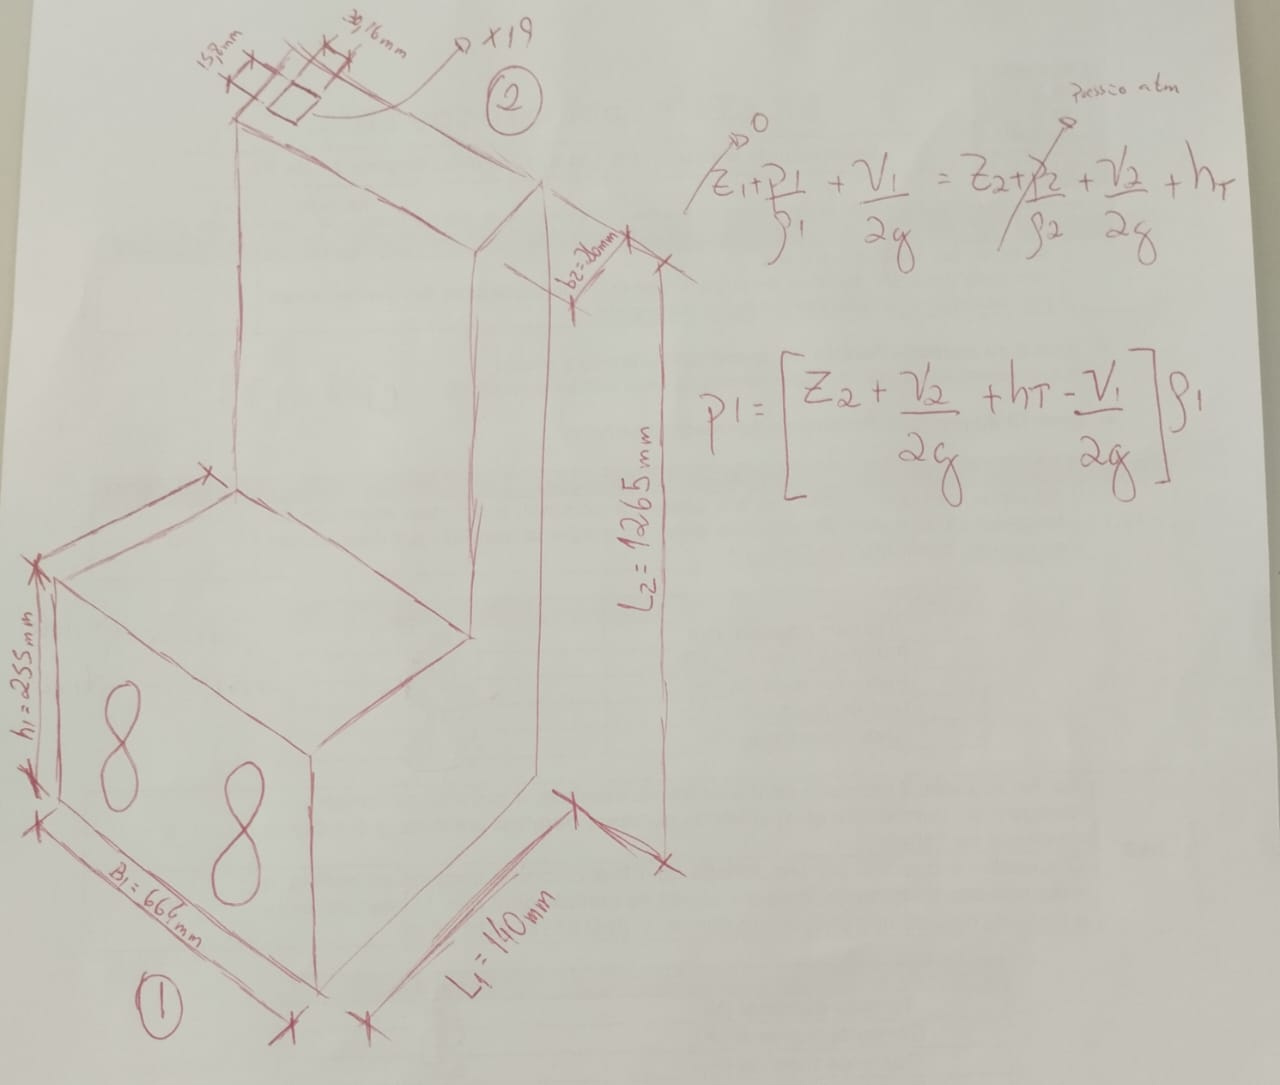

In [213]:
velocidade_saida = 2 #m/s
L1 = 140/1000 #metros
L2 = 1265/1000 #metros
b1 = 664/1000 #metros
h1 = 255/1000 #metros
b2 = 664/1000 #metros
h2 = 26/10000 #metros
b_recorte = 30.16/1000 #metros
h_recorte = 15.8/1000 #metros
n_recortes = 19
g = 9.81 #m/s²
T_ar = 273.15 + 70 #Kelvin
e = 0.05 #mm


In [214]:
A_recorte_total = b_recorte*h_recorte*n_recortes
visc_din = PropsSI('V', 'T', T_ar, 'P', 101325, 'Air')
densidade = PropsSI('D', 'T', T_ar, 'P', 101325, 'Air')
visc_cin = visc_din/densidade

In [215]:
vazao = velocidade_saida*A_recorte_total
velocidade_entrada = vazao/(b1*h1)
print('Vazão',vazao*3600)
print('velocidade entrada',velocidade_entrada)

Vazão 65.18903040000001
velocidade entrada 0.10694580675643751


In [216]:
dh1 = (4*(b1*h1))/(2*b1+2*h1)
dh2 = (4*(b2*h2))/((2*b2+2*h2))
Re1 = (velocidade_entrada*dh1)/(visc_cin)
print(Re1)
Re2 = (velocidade_saida*dh2)/(visc_cin)
print(Re2)
print('e/dh1',e/(dh1*1000))
print('e/dh2',e/(dh2*1000))


1972.0345040077227
518.3989505415096
e/dh1 0.00013568981809591307
e/dh2 0.009653035217794254


In [217]:
f1 = (64/Re1) # Para Reynolds 1972
f2 = (64/Re2) # Para Reynolds 518
#Quando Reynolds > 2000 usar Diagrama de Moody
print('f1',f1)
print('f2',f2)
hl = (100 * velocidade_entrada)/(2*g)
print('hd',hl)

f1 0.03245379321200222
f2 0.12345704005215832
hd 0.5450856613477957


In [218]:
hd2 = ((f2*L2)*(velocidade_saida**2))/(dh2*2*g)
hd1 = ((f1*L1)*(velocidade_entrada**2))/(dh1*2*g)
Pb = 0

# Pa - Perda de carga total

In [219]:
Pa = Pb + hd1 + hd2 + hl
Pa

6.6920652109464855

In [220]:
Pcorrigida = Pa*(PropsSI('D', 'T', 273.15+20, 'P', 101325, 'Air')/densidade)

In [221]:
P1 = (L2+(velocidade_saida/(2*g))+Pcorrigida-(velocidade_entrada/(2*g)))*densidade
P1

9.461645227689425

In [222]:
print('mmH20',(P1*1.5)/9.8665)

mmH20 1.4384500928935426


In [223]:
velocidade_plot = np.linspace(0.1,20,100)
pressao_plot = []
vazao_plot = []

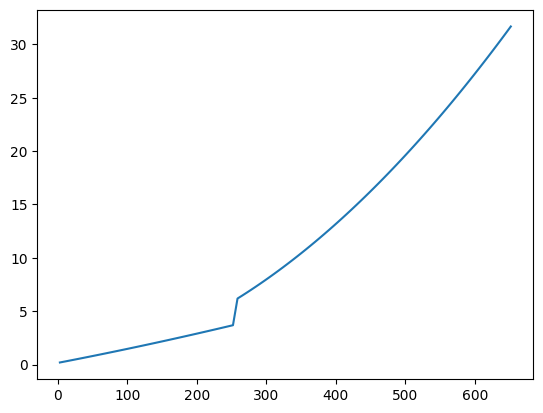

In [224]:
velocidade_plot = np.linspace(0.1,20,100)
pressao_plot = []
vazao_plot = []
for velocidade in velocidade_plot:
  visc_din = PropsSI('V', 'T', T_ar, 'P', 101325, 'Air')
  densidade = PropsSI('D', 'T', T_ar, 'P', 101325, 'Air')
  visc_cin = visc_din/densidade
  vazao = velocidade*A_recorte_total
  velocidade_entrada = vazao/(b1*h1)
  Re1 = (velocidade_entrada*dh1)/(visc_cin)
  Re2 = (velocidade*dh2)/(visc_cin)
  f1 = friction_factor(Re=Re1, eD=e/(dh1*1000))
  f2 = friction_factor(Re=Re2, eD=e/(dh2*1000))
  hl = (100 * velocidade_entrada)/(2*g)
  hd2 = ((f2*L2)*(velocidade**2))/(dh2*2*g)
  hd1 = ((f1*L1)*(velocidade_entrada**2))/(dh1*2*g)
  Pa = Pb + hd1 + hd2 + hl
  P1 = ((L2+((velocidade**2)/(2*g))+Pa-((velocidade_entrada**2)/(2*g)))*densidade)
  P1 = P1*(PropsSI('D', 'T', 273.15+20, 'P', 101325, 'Air')/densidade)
  P1 = (P1)/9.8665

  pressao_plot.append(P1)
  vazao_plot.append(vazao*3600)
plt.plot(vazao_plot,pressao_plot)

# Temperatura 70°C

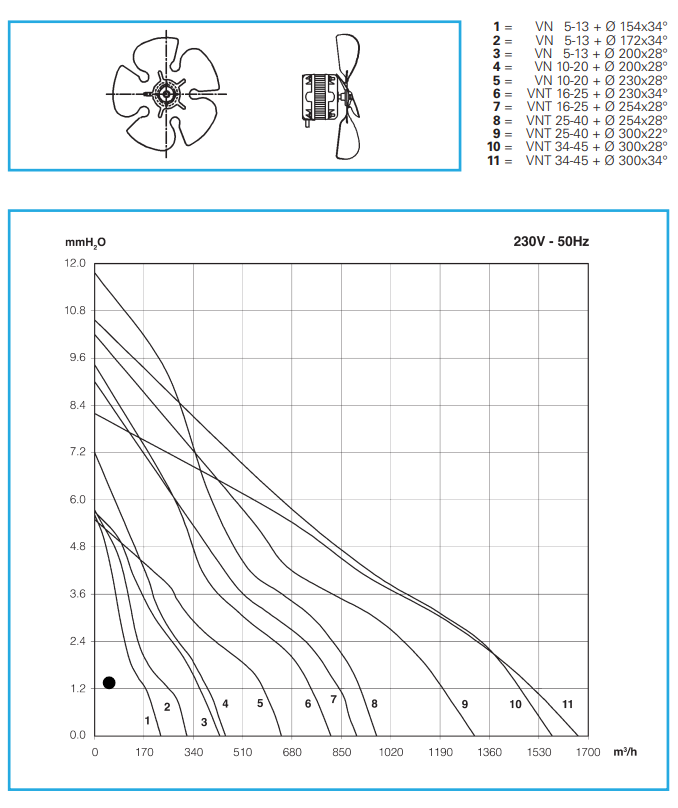